# K Nearest Neighbors / K vecinos más cercanos
Apuntes curso Python para Machine Learning (2022), Francisco Pérez Galarce, Yesenia H. Salinas

A diferencia de la mayoría de las estrategias vistas en el curso que son basadas en modelos matemáticos, KNN es un algoritmo de aprendizaje basado en instancias (instance-based learning). En este tipo de aprendizaje (también llamado aprendizaje basado en memoria), no se realiza una generalización explícita a través de un modelo, acá se comparan los nuevos datos con aquellos datos vistos en el conjunto de entrenamiento. 

Estos algoritmos no requieren de un entrenamiento previo, sin embargo, son demandantes en memoria pues necesitamos tener la base de datos de entrenamieto completa cada vez que hacemos una predicción. Una ventaja importante de este tipo de métodos es la facilidad de adaptarse a nuevos datos, debido a que dado un nuevo dato solo tenemos que incorporarlo a nuestra base de entrenamiento para ser usada en una futura predicción. En el caso de estrategias basadas en modelos (redes neuronales, regresiones, random forest, etc.) luego de recolectar nuevos datos debemos reentrenar el modelo lo que en algunos escenarios puede ser costoso computacionalmente.

La intuición de este algoritmo es que objetos cercanos en el espacio de los descriptores tendrán mayor probabilidad de tener una variable dependiente (clase o valor numérico) similar, por lo tanto, si para un nuevo dato logro encontrar los K objetos más similares dentro de una base de entrenamiento puedo inferir la variable dependiente a partir de ellos. Esta intuición de la cercanía ha sido explotada tanto para aprendizaje supervisado como en aprendizaje no supervisado, en estos apuntes nos concentraremos en su aplicación en aprendizaje supervisado. 

A continuación revisaremos KKN para clasificar y para regresiones. 

# Definiciones básicas

Asumamos que tenemos una base de datos de entrenamiento $\mathcal{D}^t = \{  \textbf{x}_i, y_{i}\}_{i=1}^{N}$, donde $\textbf{x}_i$ representa el vector de features del dato $i$. Para el caso de un modelo de clasificación $y_{i}$ representa la clase del objeto $i$, en tanto, para el caso de regresiones representará el valor numerico (variable dependiente) que buscando predecir a través de las features (variables independientes). 

# KNN para clasificación

En la imagen que se muestra abajo, se tiene un caso representativo de una clasificación. Los datos vienen de dos clases, los círculos negros representan la clase 1, los círculos blancos representan la clase 2 y el círculo rojo representa un dato no clasificado para el cual deseamos conocer su clase mediante KNN. 

En este ejemplo podemos ver que los datos son posicionados en el plano, por lo tanto, el vector de descriptores tiene tan solo dos dimensiones $\mathbf{x}$ y la cercanía entre el nuevo dato (círculo rojo) y el resto de los puntos podría ser calculada a través de la distancia euclidiana. No obstante lo anterior, para simplificar los cálculos hemos definido tres circunferencias centradas en el nuevo punto, cada una de ellas representa un valor que separa los datos de acuerdo a 3 valores de $K$. La primera circunferencia representa un $K=3$, la segunda representa un $K=7$ y la última representa un $K=12$.   

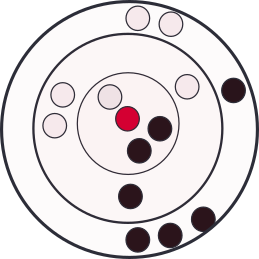

¿Qué clase se predice para cada $K$?

Si solo consideramos que cada vecino cercano aporta con un voto (se podría ponderar por distancia), para $K=3$ de los tres objetos 2 son de color negro y 1 de color blanco, por lo tanto la clasificación será clase 1. Para $K=7$ se tienen 4 círculos blancos y 3 negros, generando una predicción de clase 2. Finalmente, para $K=12$ se tienen 6 negros y 7 blancos, inferiendo para el nuevo punto la clase 2.



# KNN para regresión
Ahora en la imagen abajo se muestra un caso representativo de una regresión. Se tiene que los datos del training set ya no contienen un clase (color), ahora contiene una variable numerica de interés. Recordemos que los descriptores en este ejemplo son los que definen directamente la posición en el plano de cada dato.  


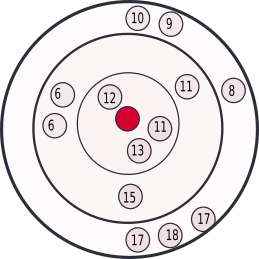

Para el caso de la regresión, y considerando igual ponderación para cada dato, las predicciones para $K=3$, $K=7$ y $K=12$ serían las siguientes:

- $K=3 \rightarrow \hat{y} = \dfrac{11+12+13}{3}=12$

- $K=7 \rightarrow \hat{y} = \dfrac{11+12+13+6+6+11+15}{7}=10.57$

- $K=12 \rightarrow \hat{y} = \dfrac{11+12+13+6+6+11+15+8+9+10+17+17+18}{3}=12.75$

# Consideraciones metodológicas

- **Distancia:** Existe una amplia gama de métricas de distancia tales como la distancia Euclidiana, distancia de Mahalanobis, distancia de Manhattan, distancia Minkowski, distancia de Chebychev, distancia Cosene, distancias basadas en correlación, etc. La más popular es la distancia euclidiana y viene por defecto en la mayoría de las librerías para trabajar con KNN. La selección de la métrica de distancia depende de varios factores, dentro de los principales podemos destacar el tipo de aplicación y el tipo de descriptores. El tipo de investigación es relevante pues existen aplicaciones donde se necesita que datos con alta correlación estén cercanos donde no interesa la similitud en features. Por otra parte, respecto al tipo de descriptor, existen métricas de distancia que son más adecuadas a descriptores continuos (Euclidiana) y otras más pertinentes para variables binarias (Jaccard). En importante mencionar, además, que la mayoría de las métricas se ven dañanadas por la dimensionalidad del vector de features, una forma de trabajar en contextos de alta dimensionalidad es reducir las dimensiones antes de pasar a KNN. La normalización también es un factor crítico, por ejemplo, si calculamos la distancia euclidiana y no hemos normalizado las features podemos asignar, sin darnos cuenta, mayor importancia a las features de mayor magnitud.        


- **Valor de $K$ y ponderación:** tal como observamos en los ejemplos arriba, el valor de $K$ tiene un efecto importante en las predicciones. La calidad y cantidad de los datos inlfuirá directamente en la selección de $K$.  Lo recomendado es hacer una búsqueda de estos hiperparámetros a través de una estrategia de cross-validation.


- **Cálculos de distancia:** El cálculo de las distancias entre todos los pares de puntos puede ser muy costoso computacionalmente. Las implementaciones más ingenuas de KNN consideran un algoritmo de fuerza bruta que calcula las distancias entre todos los pares de nodos. Estrategias basadas en árboles binarios han sido implementadas para ir dividiendo el espacio de los descriptores y de esta forma evitar cálculos de distancias entre objetos lejanos en el árbol, un ejemplo de esto es KD-Tree. 


# Referencias
- Cover, T., & Hart, P. (1967). Nearest neighbor pattern classification. IEEE transactions on information theory, 13(1), 21-27.

- Abu Alfeilat, H. A., Hassanat, A. B., Lasassmeh, O., Tarawneh, A. S., Alhasanat, M. B., Eyal Salman, H. S., & Prasath, V. S. (2019). Effects of distance measure choice on k-nearest neighbor classifier performance: a review. Big data, 7(4), 221-248.

- Bentley, J. L. (1975). Multidimensional binary search trees used for associative searching. Communications of the ACM, 18(9), 509-517.